In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import pandas as pd
from scipy.stats import gaussian_kde

In [4]:
df = pd.read_csv('../../slab2/1219database/ALL_EQ_121819.csv',low_memory=False)

banda = df.loc[(df.lon>=127)&(df.lon<=134)&(df.lat>=-10)&(df.lat<=-2)]

banda_kde = gaussian_kde(np.array([banda.lat,banda.lon]))

lon = np.linspace(127,134,400)
lat = np.linspace(-10,-2,400)
Lat,Lon = np.meshgrid(lat,lon)

pdf = banda_kde.pdf(np.array([Lat.flatten(),Lon.flatten()])).reshape(Lat.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../../slab2/1219database/ALL_EQ_121819.csv'

In [5]:
avg12k = np.load('12kavg.npz')

In [6]:
x,y = avg12k['x'],avg12k['y']
avgdtopo = avg12k['avgdtopo']

In [7]:
X,Y = np.meshgrid(x,y)

NameError: name 'Lon' is not defined

/opt/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


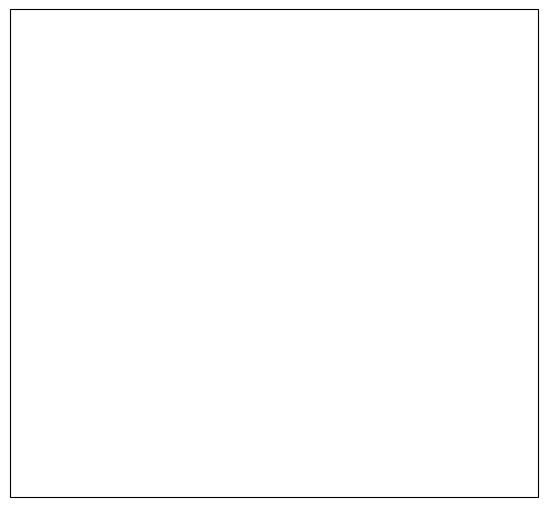

In [8]:
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(1,2,1,projection=crs)
ax.set_extent((127,133.5,-8,-2))
ax.coastlines(resolution='10m',color='white')
plt.pcolormesh(Lon,Lat,pdf,cmap='viridis')
plt.colorbar(label='prob. density',fraction=0.04, pad=0.04)
plt.xticks(np.arange(127,134))
plt.yticks(np.arange(-8,-1))
plt.title("Banda Arc seismicity")

ax = plt.subplot(1,2,2,projection=crs)
ax.set_extent((127,133.5,-8,-2))
ax.coastlines(resolution='10m',color='white')
plt.pcolormesh(X,Y,avgdtopo, cmap='viridis')
# CS = plt.contour(X,Y,avgdtopo,levels=np.linspace(-2,2,51))
# plt.clabel(CS)
plt.colorbar(label='meters',fraction=0.04, pad=0.04)
plt.xticks(np.arange(127,134))
plt.yticks(np.arange(-8,-1))
plt.title('Average seafloor deformation')
plt.savefig('../runs/18k-chains/plots/avgdtopo_vs_seismicity.pdf')

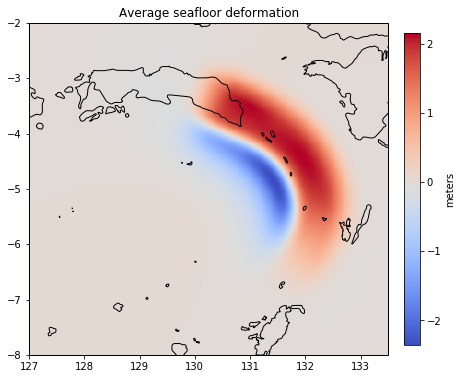

In [33]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection=crs)
ax.set_extent((127,133.5,-8,-2))
ax.coastlines(resolution='10m')
plt.pcolormesh(X,Y,avgdtopo, cmap='coolwarm')
# CS = plt.contour(X,Y,avgdtopo,levels=np.linspace(-2,2,51))
# plt.clabel(CS)
plt.colorbar(label='meters',fraction=0.04, pad=0.04)
plt.xticks(np.arange(127,134))
plt.yticks(np.arange(-8,-1))
plt.title('Average seafloor deformation')
plt.savefig('../runs/18k-chains/plots/avgdtopo.pdf')

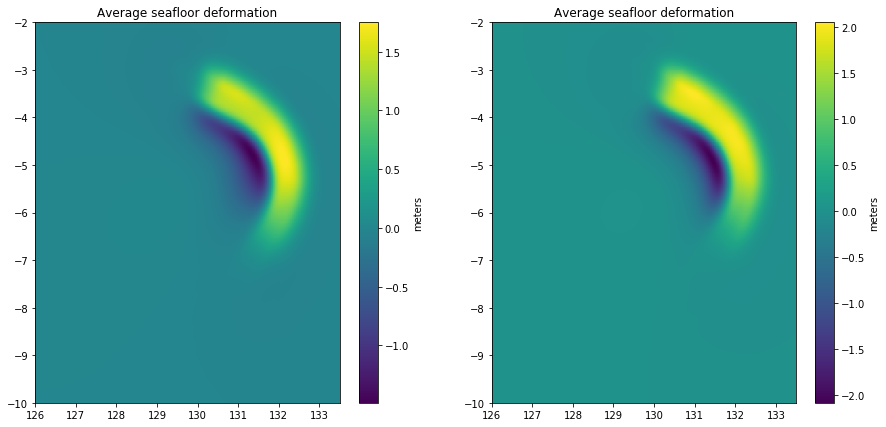

In [47]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pcolormesh(X,Y,avgdtopo)
plt.colorbar(label='meters')
plt.title('Average seafloor deformation')
plt.subplot(1,2,2)
plt.pcolormesh(X,Y,avg6000)
plt.colorbar(label='meters')
plt.title('Average seafloor deformation')
plt.show()

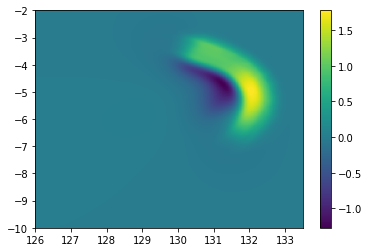

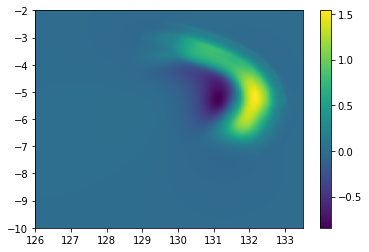

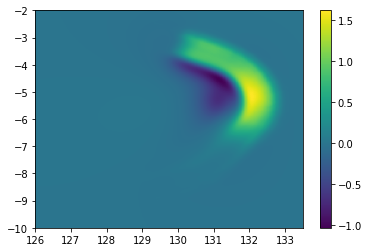

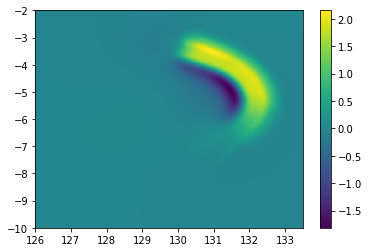

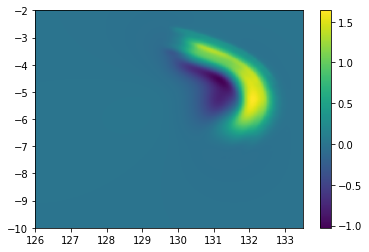

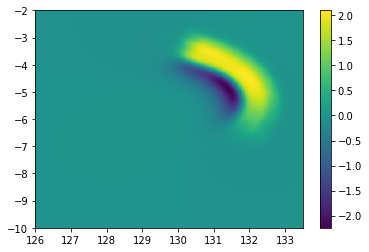

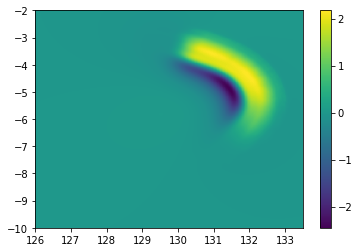

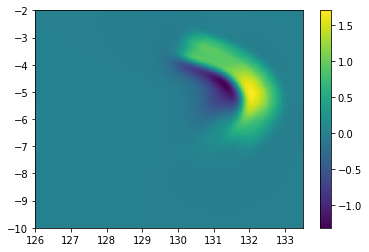

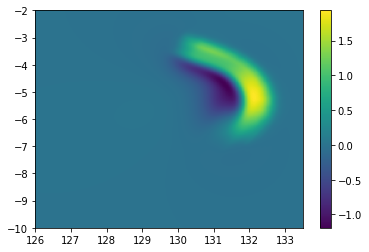

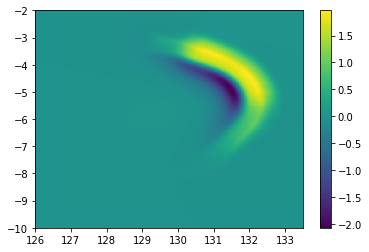

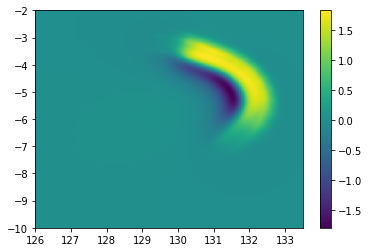

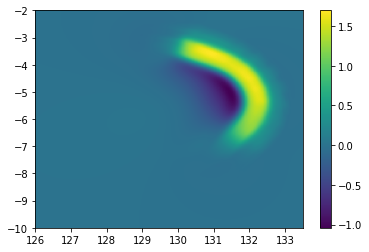

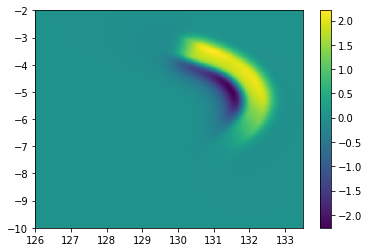

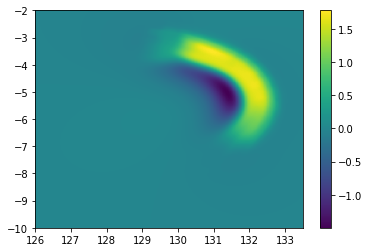

In [32]:
for dtopo in avgdtopos:
    plt.pcolormesh(X,Y,dtopo)
    plt.colorbar()
    plt.show()